# 9. Synthèse directe -- Spécifications

## 9.1 Introduction

Ce chapitre a pour objectif la synthèse d'un régulateur discret directement basée sur un modèle discret de l'installation, sous les formes:
- fonction de transfert discrète $H(z)$
- réponse harmonique échantillonnée $H(e^{j\omega h})$, tenant directement compte des convertisseurs

Il existe 2 méthodes de synthèse:
- par calibrage de la boucle; l'idée est d'étudier la réponse fréquentielle afin d'imposer des marges de stabilité
- par placement de pôles; l'idée est l'étude du lieu des pôles afin d'imposer un régime transitoire

## 9.2 Performance en régime permanent

Lorsque les écarts permanents sont imposés, il est possible d'utiliser les tableaux développés au Chapitre 7 afin de déterminer la structure ainsi que les gains.

Cependant, une synthèse basée sur les écarts permanents ne tient en aucun compte des aspects de robustesse. Le résultat peut donc être très oscillant ou même instable.

#### Exemple
Soit la fonction de transfert suivante, avec $h=0.025$:

$$ H(z) = \frac{10^{-3}(1.23z + 1.21)}{(z-1)(z-0.95)} $$

Les spécifications requièrent un statisme d'asservissement nul et une traînée inférieure ou égale à $0.05$.

Comme la fonction de transfert contient déjà un intégrateur, l'écart statique d'asservissement sera déjà nul en boucle fermée.

Le gain permanent du système en boucle ouverte est:

$$ \gamma = \lim_{z \rightarrow 1} (z-1) K_p \frac{10^{-3}(1.23z + 1.21)}{(z-1)(z-0.95)} = 0.049 K_p $$

On peut maintenant calculer le gain $K_p$:

$$ \frac{h}{\gamma} = \frac{0.51}{K_p} \leq 0.05 $$

On obtient donc l'inégalité $K_p \geq 10.2$.

## 9.3 Robustesse de la stabilité

Les marges de gain, de phase, de retard et de module permettent de garantir la robustesse de la stabilité du système en boucle fermée. Nous verrons comment synthétiser un régulateur basé sur les marges de stabilité.

## 9.4 Amortissement du régime transitoire

Il est important de garder à l'esprit les faits suivants:
- la réponse d'un système possède un régime transitoire et un régime permanent
- le régime transitoire fixe la qualité dynamique de la réponse (temps de réponse, dépassement...)
- le régime transitoire est décrit par une combinaison linéaire de ses modes, dépendant eux-mêmes des pôles
- en boucle fermée, les pôles sont les zéros du polynôme caractéristique, identique pour toutes les fonctions de transfert (voir matrice du Chapitre 5)
- la pondération des différents modes dépend des pôles et des zéros; ceci explique pourquoi les différentes fonctions de transfert se comportent différemment ($y(kh)$ n'évolue pas de la même façon pour une consigne ou pour une perturbation)

Les modes du régime transitoire prennent l'une de ces 2 formes:
- $p^k,\, p \in \mathbb{R}$
- $r^k \cos(k\omega + \varphi),\, p = r e^{j\omega}$

Comme le système est considéré stable, $|p| < 1$

### Condition absolue d'amortissement

Lorsque $p$ est réel, la réponse impulsionnelle est du type $p^k$.

Une condition absolue d'amortissement exprime que tout mode $p^k$ jouant sur le régime transitoire doit s'atténuer d'un facteur au moins $a > 1$ en un temps $k_a h$. Les valeurs de $a$ et $k_a$ sont fournies par l'utilisateur. Par exemple, un facteur $a=20$ signifie que le transitoire doit s'amortir dans le temps $k_a h$ d'au moins un facteur 20, soit un amortissement de $95\%$.

$$
\begin{align}
  |p^{k_a}| &\leq \frac{1}{a} \\
  |p|^{k_a} &\leq \frac{1}{a} \\
  \ln |p| &\leq -\frac{\ln a}{k_a} \\
  |p| &\leq e^{-\frac{\ln a}{k_a}}
\end{align}  
$$

Il faut donc, pour que le système soit amorti dans le temps imposé, que la dernière inégalité soit respectée.

Lorsque $p$ est complexe, la réponse impulsionnelle est du type $r^k \cos(k\omega + \varphi)$.

La condition absolue d'amortissement est imposée sur l'amplitude des oscillations; elle s'écrit donc ainsi:

$$ r \leq e^{-\frac{\ln a}{k_a}} $$

Cela signifie donc que, pour imposer une condition absolue d'amortissement d'une valeur au moins $a$ en un temps $k_a h$, les pôles du système en boucle fermée doivent se trouver à l'intérieur du cercle centré à l'origine de rayon $e^{-\frac{\ln a}{k_a}}$. 

Des valeurs typiques de $a$ et $k_a$, conduisent à des cerlces de rayon:

$$ 0.5 \leq e^{-\frac{\ln a}{k_a}} \leq 0.9 $$

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math

In [7]:
def sign(x):
    return x / abs(x)

def plot_ax(phase_z, magn_z, r, l='-'):
    ax = plt.subplot(projection='polar')
    ax.plot(phase_z, magn_z, l)
    ax.set_rticks([0, r, 1])

In [8]:
a = 20
ka = 10

r = math.exp(-math.log(a)/ka)

magn1_z = [r for i in range(101)]
phase1_z = [i / 100 * 2 * math.pi for i in range(101)]

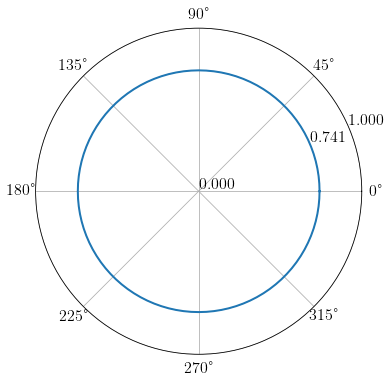

In [9]:
plot_ax(phase1_z, magn1_z, r)

Les pôles doivent tous se trouver à l'intérieur du cercle sur la figure.

### Condition relative d'amortissement

Cette fois-ci, au lieu d'imposer une condition sur le temps d'amortissement, la condition est imposée sur le nombre $N$ d'oscillations. Le temps s'écoulant durant $N$ oscillations est noté $k_a h$, où $k_a$ est souvent non entier. Le nombre $k_a$ est donc calculé à partir de $N$:

$$ N\, \text{tours} = \omega h k_a = 2\pi N $$

En reprenant le résultat obtenu pour l'amortissement absolu et en remplaçant:

$$ r \leq e^{-\frac{\ln a}{2\pi N} \omega h} $$

Le pôle $p=re^{j\omega h}$ doit donc respecter la condition:

$$ |p| \leq e^{-\frac{\ln a}{2\pi N} \omega h} e^{j\omega h} $$

qui correspond à un morceau de spirale logarithmique.

On rencontre souvent les valeurs de $a=535$ et $N=1$, correspondant à ce qui est appelé une réponse optimale.

In [10]:
a = 535
N = 1

h = 1
omega = [i / 100 * math.pi / h for i in range(101)]

magn2_z = [math.exp(-math.log(a) / (2 * math.pi * N) * o * h) for o in omega]
phase2_z = [o * h for o in omega]
phase3_z = [-p for p in phase2_z]

r = magn_z[-1]

NameError: name 'magn_z' is not defined

In [ ]:
plot_ax(phase2_z, magn2_z, r)
plot_ax(phase3_z, magn2_z, r)

Les pôles doivent tous se trouver à l'intérieur de la forme sur la figure.

### Condition absolue et relative d'amortissement

Souvent, on peut rencontrer les 2 types de conditions en même temps. Les pôles doivent donc appartenir à l'intersection des 2 ensembles (le cercle et la spirale).

In [ ]:
plot_ax(phase1_z, magn1_z, r, l='--')
plot_ax(phase2_z, magn2_z, r, l='g-.')
plot_ax(phase3_z, magn2_z, r, l='g-.')

La synthèse d'un régulateur basée sur les conditions d'amortissement se fait par placement de pôles dans le lieu des pôles.

On peut remarquer que ces figures ressemblent à celles tracées au Chapitre 5, lors de la transformation des zones du plan $s$ par échantillonnage.

### Spécifications sur la réponse indicielle

Ces spécifications sont déjà connues à ce stade. On y retrouve:
- le temps de montée
- le temps d'établissement (temps à $X\%$, avec $X\in [2, 5]\%$)
- le dépassement
- l'écart permanent

Ces spécifications peuvent être imposées en asservissement ou en régulation, suivant les besoins.

## 9.5 Sensibilité

La fonction de transfert $G(z)$ modélisant le système est sujette à des imprécisions dues à des erreurs de modélisation et/ou de lentes fluctuations. La structure en boucle fermée doit pouvoir atténuer les effets.

Le concept de sensibilité d'une fonction $f(z)$ au paramètre $z$ est défini ainsi:

$$ \mathscr{S}_z^f(z) = \lim_{\Delta z \rightarrow 0} \frac{\frac{f(z+\Delta z)-f(z)}{f(z)}}{\frac{\Delta z}{z}} = \frac{\lim_{\Delta z \rightarrow 0} \frac{f(z+\Delta z)-f(z)}{f(z)}}{\frac{\Delta z}{z}} = \frac{\frac{df}{dz}(z)}{\frac{f(z)}{z}} $$

### Montage en asservissement

En boucle ouverte, la fonction de transfert s'écrit:

$$ \mathscr{T}_0(G) = KG $$

Le régulateur $K$ est supposé ne pas être sujet à des variations car il est numérique.

La sensibilité du montage aux variations de la fonction de transfert est donnée par:

$$ \mathscr{S}_G^{\mathscr{T}_0} = \frac{\frac{d\mathscr{T}_0}{dG}(G)}{\frac{\mathscr{T}_0(G)}{G}} = \frac{K}{\frac{KG}{G}} = 1 $$

Une variation ou erreur sur la fonction de transfert se transmet donc intégralement sur le comportement de la boucle ouverte.

En boucle fermée, on obtient:

$$ \mathscr{T}(G) = \frac{KG}{1+KG} $$

La sensibilité du montage aux variations de la fonction de transfert est donnée par:

$$ \mathscr{S}_G^{\mathscr{T}}(G) = \frac{\frac{d\mathscr{T}}{dG}(G)}{\frac{\mathscr{T}(G)}{G}} = \frac{\frac{(1+KG)K-KGK}{(1+KG)^2}}{\frac{1}{G}\frac{KG}{1+KG}} = \frac{1}{1+KG} $$

Cette fonction de transfert avait été appelée la fonction de sensibilité. Ce développement montre donc le choix de ce nom.

Afin d'avoir la sensibilité la plus faible possible aux erreurs de modélisation et/ou variations des paramètres du système, il faut augmenter le gain $K$ ou ajouter un intégrateur dans le système. On revient donc au problème des vases communiquants, montrant qu'une faible sensibilité dans une plage de fréquence donnée est contre-balancée par un pic de sensibilité à plus hautes fréquences, diminuant au passage les marges de stabilité.

### Montage en régulation

La boucle fermée s'écrit:

$$ \frac{G}{1+KG} $$

La sensibilité donne donc:

$$ \mathscr{S} = \frac{\frac{1+KG-KG}{(1+KG)^2}}{\frac{1}{G}\frac{G}{1+KG}} = \frac{1}{1+KG} $$

On retrouve la même fonction de sensibilité que pour le montage en asservissement.

### Ajout d'un capteur

En réalité, le signal de mesure $Y'(z)$ est différent du signal de sortie $Y(z)$ car les capteurs et instruments de mesure ne sont pas parfaits. En ajoutant donc un capteur de fonction de transfert $C(z)$ dans la chaîne de retour, la fonction de transfert en boucle fermée en asservissement devient:

$$ \mathscr{T}(C) = \frac{KG}{1+KGC} $$

La sensibilité du montage aux variations du capteur est:

$$ \mathscr{S}_C^{\mathscr{T}}(C) = \frac{\frac{d\mathscr{T}}{dC}(C)}{\frac{\mathscr{T}(C)}{C}} = \frac{\frac{-(KG)^2}{(1+KGC)^2}}{\frac{1}{C}\frac{KG}{1+KGC}} = -\frac{KGC}{1+KGC} = -1 + \frac{1}{1+KGC} $$

En considérant qu'un capteur idéal possède une fonction de transfert $C(z) = 1$, des variations autour de cette valeur nominale donnent:

$$ \mathscr{S}_C^{\mathscr{T}}(C) = -1 + \frac{1}{1+KG} $$

Comme, en régime harmonique, la fonction de sensibilité doit avoir une faible amplitude afin de garantir de bonnes performances, on se rend compte que la sensibilité du montage au capteur est proche de $-1$. Il est donc très important d'avoir un capteur bien étalonné et très robuste à l'environnement afin de ne pas subir de dérives. Ce capteur est donc un élément onéreux dans la chaîne de rétroaction.

## 9.6 Fonction de transfert harmonique en boucle fermée

Le montage en asservissement est donné par la fonction de transfert:

$$ T(z) = \frac{K(z)G(z)}{1+K(z)G(z)} $$

Cette fonction a été appelée fonction de sensibilité complémentaire.

Cette fonction de transfert représente le lien entre la sortie $Y(z)$ et la consigne $Y_c(z)$. La forme de sa réponse harmonique devrait donc posséder les caractéristiques suivantes:
- en basse fréquence, dans une bande de fréquence donnée, le gain doit valoir $0\, \mathrm{dB}$ afin de garantir que l'entrée ne soit pas filtrée
- en haute fréquence, l'amplitude chute fortement afin d'atténuer les bruits de mesure, qui, pour rappel, ont comme fonction de transfert les reliant à $Y(z)$, $-T(z)$ ainsi que d'augmenter les marges de stabilité (si l'amplitude chute très vite avec l'augmentation de $\omega$, la courbe reste éloignée du point $-1$)
- un pic appelé gain à la résonnance est toléré
- lors de sa chute, l'amplitude passe par le point d'amplitude $-3\, \mathrm{dB}$, appelé pulsation de coupure; elle donne une idée de la constante de temps du système en boucle fermée

L'analyse de la fonction de transfert $T(z)$ nous permet de remarquer que:
- lorsque le module de la boucle ouverte $K(e^{j\omega h})G(e^{j\omega h})$ est beaucoup plus petit que $1$, les réponses harmoniques de la boucle ouverte et fermée sont proches l'une de l'autre
- afin que $\left|T(e^{j\omega h})\right|$ soit constant et égal à $0\, \mathrm{dB}$ dans la majeure partie de la bande passante, il faut que le module de $K(e^{j\omega h})G(e^{j\omega h})$ soit grand; soit en ajoutant un intégrateur, soit en ayant un gain permanent élevé

Afin de synthétiser un régulateur tenant compte de ces recommandations, il faudra faire appel au calibrage de la boucle, la méthode de synthèse fréquentielle.

#### Remarque
Lorsqu'on conçoit un système en boucle fermée, la fréquence d'échantillonnage doit être choisie telle que le système en boucle fermée respecte le théorème de Shannon. Pour cela, il est recommandé de prendre une pulsation d'échantillonnage égale à:

$$ \omega_e = [10 \dots 20] \omega_b $$